In [1]:
import numpy as np
from bb_exponential import ExponentialBlocks_Events, test_bb_exp
from astropy.stats import bayesian_blocks
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
import os
from multiprocessing import Pool
from itertools import repeat
import time

/nix/store/6jkzp4k9flx42l3ka9n4zyp7x05gcgri-python3-3.10.13-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def apply_exp(t,x,t_start,gamma,a):
    y = np.concatenate([np.zeros(t_start),np.floor(gamma*np.exp(a*(t[t_start:]-t_start)))])
    return x + y
def apply_gauss_round(x,dev):
    return np.round(np.random.normal(x,dev))

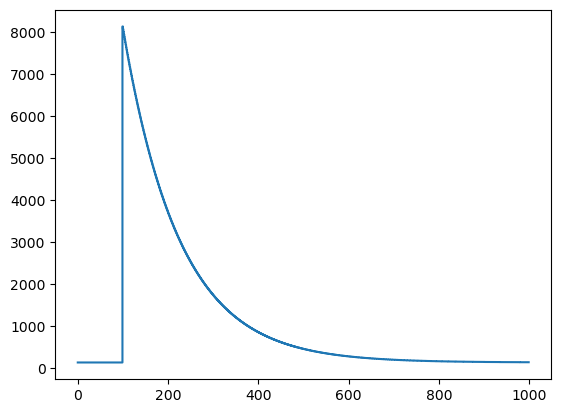

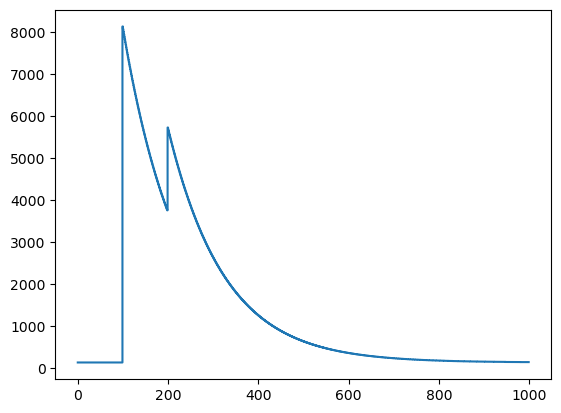

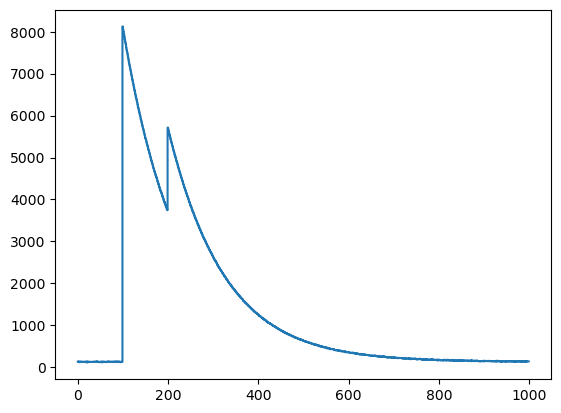

In [5]:
t = np.arange(0,1000)
#x = np.random.poisson(125,1000)
x = np.ones(1000)*125
x = apply_exp(t,x,100,8000,-0.008)
plt.step(t,x)
plt.show()
x = apply_exp(t,x,200,2000,-0.008)
plt.step(t,x)
plt.show()
x = apply_gauss_round(x,5)
plt.step(t,x)

/home/tirocinio/Codice/tirocinio/BBexponential/bb_exponential.py:69: RuntimeWarning: overflow encountered in exp
  return N_k*(np.log((a*N_k)/(1-np.exp(-a*T_k)))+a*S_k-1)
/home/tirocinio/Codice/tirocinio/BBexponential/bb_exponential.py:69: RuntimeWarning: divide by zero encountered in log
  return N_k*(np.log((a*N_k)/(1-np.exp(-a*T_k)))+a*S_k-1)
/nix/store/6jkzp4k9flx42l3ka9n4zyp7x05gcgri-python3-3.10.13-env/lib/python3.10/site-packages/scipy/optimize/_zeros_py.py:467: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


Tempo di Calcolo: 17.020412921905518
Estremi: [  0.   99.5 199.5 595.5 999. ]
Blocco 0: a=-0.0006647324279744724,gamma=122.27763838279992
Blocco 1: a=-0.008534859102835525,gamma=3573.849910570873
Blocco 2: a=-0.007350366738708302,gamma=305.4282199699179
Blocco 3: a=-0.002534392590192609,gamma=112.1444353524456


/home/tirocinio/Codice/tirocinio/BBexponential/bb_exponential.py:208: RuntimeWarning: overflow encountered in exp
  gamma = np.divide(a*N_k,1-np.exp(-a*T_k))


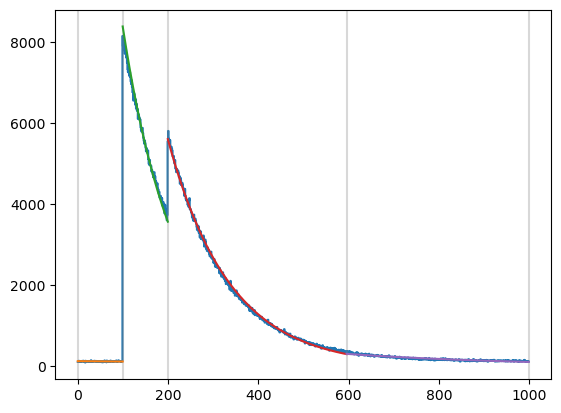

In [4]:
test_bb_exp(t,x)

In [ ]:
t = np.arange(0,1000)
mid_path=time.time()
outdir = f'outdir/artificial_{mid_path}'
if not os.path.exists(outdir):
    os.makedirs(outdir)
for i in range(100):
    gamma = np.random.randint(100,1000)
    t_start = np.random.randint(100,450)
    x = apply_gauss_round(apply_exp(t,np.ones(1000)*125,t_start,gamma,-0.008),5)
    test_bb_exp(t,x,save=True,name=f'{outdir}/gamma_{gamma}_t_start_{t_start}.png')